## COMPARISON OF GERMLINE VARIANTS WITH OTHER PEDIATRIC PATIENTS

In [1]:
# Needed basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3
import time

from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
from tqdm.notebook import tqdm
tqdm.pandas()
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [2]:
# Read mutation data that passed filters from germline sample

germline_df = pd.read_csv("/workspace/projects/sjd_melos/MAFs_tables/1_callers/Germline_passed_mut.tsv.gz", sep = "\t",)

In [3]:
germline_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,GT,AD,DP,GQ,PL
0,chr1,13273,.,G,C,1444.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.096;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:120,63:183:99:1452,0,3326",0/1,"120,63",183,99,"1452,0,3326"
1,chr1,13813,.,T,G,114.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-5.261;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:90,16:106:99:122,0,3424",0/1,"90,16",106,99,"122,0,3424"
2,chr1,13838,rs200683566,C,T,503.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=5.055;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:110,23:133:99:511,0,2959",0/1,"110,23",133,99,"511,0,2959"
3,chr1,14599,.,T,A,146.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.384;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:158,15:173:99:154,0,6545",0/1,"158,15",173,99,"154,0,6545"
4,chr1,14604,.,A,G,167.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.322;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:165,16:181:99:175,0,6793",0/1,"165,16",181,99,"175,0,6793"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172574,chrY,56887491,.,C,A,120.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.262;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:43,8:51:99:128,0,1390",0/1,"43,8",51,99,"128,0,1390"
5172575,chrY,56887503,.,G,T,55.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=1.086;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:43,6:49:63:63,0,1327",0/1,"43,6",49,63,"63,0,1327"
5172576,chrY,56887583,rs77686620,G,A,1261.06,PASS,AC=2;AF=1.00;AN=2;CNN_1D=3.216;DB;DP=42;Excess...,GT:AD:DP:GQ:PL,"1/1:0,34:34:99:1275,102,0",1/1,"0,34",34,99,"1275,102,0"
5172577,chrY,56887837,.,G,A,37.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=2.451;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:13,2:15:45:45,0,519",0/1,"13,2",15,45,"45,0,519"


In [4]:
import os, sys

# Paths from germline data from pediatric patients

pt1_dir = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/AQ5174/vcf_processing/haplotype_caller/"
pt2_dir = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt2/AQ5175/vcf_processing/haplotype_caller/"
pt3_dir = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt3/AQ5176/vcf_processing/haplotype_caller/"
pt8_dir = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt8/AW8061/vcf_processing/haplotype_caller/"

# These are the files of the variable path
files1 = os.listdir(pt1_dir)
files2 = os.listdir(pt2_dir)
files3 = os.listdir(pt3_dir)
files8 = os.listdir(pt8_dir)
display('Data from patient 1:',files1)
display('Data from patient 2:', files2)
display('Data from patient 3:', files3)
display('Data from patient 8:', files8)

'Data from patient 1:'

['AQ5174_chr7.maf.gz',
 'AQ5174_chr5.maf.gz',
 'AQ5174_chr3.maf.gz',
 'AQ5174_chr1.maf.gz',
 'AQ5174_chr8.maf.gz',
 'AQ5174_chr6.maf.gz',
 'AQ5174_chr4.maf.gz',
 'AQ5174_chr9.maf.gz',
 'AQ5174_chr2.maf.gz',
 'AQ5174_chr11.maf.gz',
 'AQ5174_chr13.maf.gz',
 'AQ5174_chr15.maf.gz',
 'AQ5174_chr10.maf.gz',
 'AQ5174_chr14.maf.gz',
 'AQ5174_chr12.maf.gz',
 'AQ5174_chr16.maf.gz',
 'AQ5174_chr21.maf.gz',
 'AQ5174_chr17.maf.gz',
 'AQ5174_chr19.maf.gz',
 'AQ5174_chr22.maf.gz',
 'AQ5174_chrX.maf.gz',
 'AQ5174_chrY.maf.gz',
 'AQ5174_chr20.maf.gz',
 'AQ5174_chr18.maf.gz']

'Data from patient 2:'

['AQ5175_chr7.maf.gz',
 'AQ5175_chrY.maf.gz',
 'AQ5175_chr22.maf.gz',
 'AQ5175_chr21.maf.gz',
 'AQ5175_chr20.maf.gz',
 'AQ5175_chr19.maf.gz',
 'AQ5175_chr18.maf.gz',
 'AQ5175_chr17.maf.gz',
 'AQ5175_chr15.maf.gz',
 'AQ5175_chr16.maf.gz',
 'AQ5175_chr14.maf.gz',
 'AQ5175_chrX.maf.gz',
 'AQ5175_chr13.maf.gz',
 'AQ5175_chr9.maf.gz',
 'AQ5175_chr12.maf.gz',
 'AQ5175_chr10.maf.gz',
 'AQ5175_chr11.maf.gz',
 'AQ5175_chr8.maf.gz',
 'AQ5175_chr5.maf.gz',
 'AQ5175_chr6.maf.gz',
 'AQ5175_chr3.maf.gz',
 'AQ5175_chr4.maf.gz',
 'AQ5175_chr1.maf.gz',
 'AQ5175_chr2.maf.gz']

'Data from patient 3:'

['AQ5176_chr7.maf.gz',
 'AQ5176_chr5.maf.gz',
 'AQ5176_chr3.maf.gz',
 'AQ5176_chr1.maf.gz',
 'AQ5176_chr8.maf.gz',
 'AQ5176_chr6.maf.gz',
 'AQ5176_chr4.maf.gz',
 'AQ5176_chr9.maf.gz',
 'AQ5176_chr2.maf.gz',
 'AQ5176_chr11.maf.gz',
 'AQ5176_chr13.maf.gz',
 'AQ5176_chr15.maf.gz',
 'AQ5176_chr10.maf.gz',
 'AQ5176_chr14.maf.gz',
 'AQ5176_chr12.maf.gz',
 'AQ5176_chr16.maf.gz',
 'AQ5176_chr21.maf.gz',
 'AQ5176_chr17.maf.gz',
 'AQ5176_chr19.maf.gz',
 'AQ5176_chrX.maf.gz',
 'AQ5176_chr22.maf.gz',
 'AQ5176_chrY.maf.gz',
 'AQ5176_chr20.maf.gz',
 'AQ5176_chr18.maf.gz']

'Data from patient 8:'

['AW8061_chrY.maf.gz',
 'AW8061_chr22.maf.gz',
 'AW8061_chr21.maf.gz',
 'AW8061_chr19.maf.gz',
 'AW8061_chr20.maf.gz',
 'AW8061_chr17.maf.gz',
 'AW8061_chr18.maf.gz',
 'AW8061_chr16.maf.gz',
 'AW8061_chr15.maf.gz',
 'AW8061_chr14.maf.gz',
 'AW8061_chrX.maf.gz',
 'AW8061_chr13.maf.gz',
 'AW8061_chr9.maf.gz',
 'AW8061_chr12.maf.gz',
 'AW8061_chr10.maf.gz',
 'AW8061_chr8.maf.gz',
 'AW8061_chr11.maf.gz',
 'AW8061_chr7.maf.gz',
 'AW8061_chr5.maf.gz',
 'AW8061_chr6.maf.gz',
 'AW8061_chr3.maf.gz',
 'AW8061_chr4.maf.gz',
 'AW8061_chr1.maf.gz',
 'AW8061_chr2.maf.gz']

In [5]:
# Perform a chromosome list
chrom = []
for n in range(1,23):
    chrom.append('chr'+str(n))
chrom.append('chrX')    
chrom.append('chrY') 

In [6]:
# Define function that reads files based on chrom list and returns a dataframe

# First create the dataframes
pt1_df = pd.DataFrame()
pt2_df = pd.DataFrame()
pt3_df = pd.DataFrame()
pt8_df = pd.DataFrame()

pt1_id = 'AQ5174_'
pt2_id = 'AQ5175_'
pt3_id = 'AQ5176_'
pt8_id = 'AW8061_'

for c in chrom: # use the chrom list to read each file chromosome by chromosome, then concat with dataframes
    columns = ['CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT','NORMAL','n_ref_reads','n_alt_reads','n_AF','DP_normal','GT_normal','mut_type']
    chr1_df = pd.read_csv(pt1_dir + pt1_id + c +'.maf.gz', names = columns, sep="\t", comment='#', header=None)
    chr2_df = pd.read_csv(pt2_dir + pt2_id + c + '.maf.gz', sep="\t", names = columns, comment='#', header=None)
    chr3_df = pd.read_csv(pt3_dir+ pt3_id + c + '.maf.gz', sep="\t", names = columns, comment='#', header=None)
    chr8_df = pd.read_csv(pt8_dir + pt8_id + c +'.maf.gz', sep="\t", names = columns, comment='#', header=None)

    pt1_df = pd.concat([pt1_df,chr1_df],ignore_index=True)
    pt2_df = pd.concat([pt2_df,chr2_df],ignore_index=True)
    pt3_df = pd.concat([pt3_df,chr3_df],ignore_index=True)
    pt8_df = pd.concat([pt8_df,chr8_df],ignore_index=True)

In [7]:
display(pt1_df.head())
display(pt2_df.head())
display(pt3_df.head())
display(pt8_df.head())

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type
0,chr1,10440,.,C,-,568.73,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.290e-01;Cli...,GT:AD:DP:GQ:PL,"0/1:12,24:36:99:606,0,218",12,24,0.5,36,0/1,indel
1,chr1,10904,.,G,A,698.77,PASS,AC=2;AF=1.00;AN=2;DP=17;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL,"1/1:0,17:17:51:1|1:10904_G_A:727,51,0",0,17,1.0,17,1/1,snv
2,chr1,10927,.,A,G,376.78,PASS,AC=2;AF=1.00;AN=2;DP=9;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL,"1/1:0,9:9:27:1|1:10904_G_A:405,27,0",0,9,1.0,9,1/1,snv
3,chr1,14398,.,TGT,-,49.73,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.075e+00;Cli...,GT:AD:DP:GQ:PL,"0/1:13,3:16:87:87,0,671",13,3,0.5,16,0/1,indel
4,chr1,17385,.,G,A,1877.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.640e-01;Cli...,GT:AD:DP:GQ:PGT:PID:PL,"0/1:244,76:320:99:0|1:17385_G_A:1906,0,8183",244,76,0.5,320,0/1,snv


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type
0,chr1,10449,.,-,CCAACCCCAACCCCAACGCTAACG,93.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=1.56;ClippingR...,GT:AD:DP:GQ:PL,"0/1:21,5:27:99:122,0,817",21,5,0.5,27,0/1,indel
1,chr1,10492,.,C,T,126.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=2.61;ClippingR...,GT:AD:DP:GQ:PL,"0/1:13,5:18:99:155,0,336",13,5,0.5,18,0/1,snv
2,chr1,10622,.,T,G,171.90,PASS,AC=2;AF=1.00;AN=2;DP=6;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL,"1/1:0,5:5:15:1|1:10622_T_G:200,15,0",0,5,1.0,5,1/1,snv
3,chr1,10623,.,T,C,171.90,PASS,AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL,"1/1:0,2:2:15:1|1:10622_T_G:200,15,0",0,2,1.0,2,1/1,snv
4,chr1,10816,.,-,C,508.73,PASS,AC=2;AF=1.00;AN=2;DP=16;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,15:15:45:546,45,0",0,15,1.0,15,1/1,indel


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type
0,chr1,10617,.,CGCCGTTGCAAAGGCGCGCCG,-,146.73,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.303;Clipping...,GT:AD:DP:GQ:PL,"0/1:5,5:10:99:184,0,157",5,5,0.5,10,0/1,indel
1,chr1,10904,.,G,A,123.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.890e-01;Cli...,GT:AD:DP:GQ:PL,"0/1:3,5:8:99:152,0,102",3,5,0.5,8,0/1,snv
2,chr1,13418,.,-,GAGA,1581.73,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.010e-01;Cli...,GT:AD:DP:GQ:PGT:PID:PL,"0/1:6,38:44:99:0|1:13417_C_CGAGA:1619,0,135",6,38,0.5,44,0/1,indel
3,chr1,15904,.,-,C,1138.73,PASS,AC=2;AF=1.00;AN=2;DP=35;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,33:33:99:1176,99,0",0,33,1.0,33,1/1,indel
4,chr1,16288,.,C,G,521.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.015;Clipping...,GT:AD:DP:GQ:PL,"0/1:112,36:148:99:550,0,4494",112,36,0.5,148,0/1,snv


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type
0,chr1,10583,.,G,A,45.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.807e+00;Cli...,GT:AD:DP:GQ:PL,"0/1:15,4:19:74:74,0,544",15,4,0.5,19,0/1,snv
1,chr1,10617,.,CGCCGTTGCAAAGGCGCGCCG,-,150.73,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=1.73;ClippingR...,GT:AD:DP:GQ:PL,"0/1:5,5:10:99:188,0,166",5,5,0.5,10,0/1,indel
2,chr1,10904,.,G,A,46.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;ClippingR...,GT:AD:DP:GQ:PGT:PID:PL,"0/1:3,2:5:75:0|1:10904_G_A:75,0,224",3,2,0.5,5,0/1,snv
3,chr1,10927,.,A,G,46.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.524;Clipping...,GT:AD:DP:GQ:PGT:PID:PL,"0/1:3,2:5:75:0|1:10904_G_A:75,0,224",3,2,0.5,5,0/1,snv
4,chr1,15904,.,-,C,603.73,PASS,AC=2;AF=1.00;AN=2;DP=17;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,17:17:54:641,54,0",0,17,1.0,17,1/1,indel


In [8]:
germline_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,GT,AD,DP,GQ,PL
0,chr1,13273,.,G,C,1444.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.096;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:120,63:183:99:1452,0,3326",0/1,"120,63",183,99,"1452,0,3326"
1,chr1,13813,.,T,G,114.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-5.261;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:90,16:106:99:122,0,3424",0/1,"90,16",106,99,"122,0,3424"
2,chr1,13838,rs200683566,C,T,503.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=5.055;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:110,23:133:99:511,0,2959",0/1,"110,23",133,99,"511,0,2959"
3,chr1,14599,.,T,A,146.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.384;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:158,15:173:99:154,0,6545",0/1,"158,15",173,99,"154,0,6545"
4,chr1,14604,.,A,G,167.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.322;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:165,16:181:99:175,0,6793",0/1,"165,16",181,99,"175,0,6793"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172574,chrY,56887491,.,C,A,120.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.262;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:43,8:51:99:128,0,1390",0/1,"43,8",51,99,"128,0,1390"
5172575,chrY,56887503,.,G,T,55.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=1.086;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:43,6:49:63:63,0,1327",0/1,"43,6",49,63,"63,0,1327"
5172576,chrY,56887583,rs77686620,G,A,1261.06,PASS,AC=2;AF=1.00;AN=2;CNN_1D=3.216;DB;DP=42;Excess...,GT:AD:DP:GQ:PL,"1/1:0,34:34:99:1275,102,0",1/1,"0,34",34,99,"1275,102,0"
5172577,chrY,56887837,.,G,A,37.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=2.451;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:13,2:15:45:45,0,519",0/1,"13,2",15,45,"45,0,519"


In [9]:
# Check all df have been quality filtered
display(pt1_df[pt1_df['FILTER'] != 'PASS'])
display(pt2_df[pt2_df['FILTER'] != 'PASS'])
display(pt3_df[pt3_df['FILTER'] != 'PASS'])
display(pt8_df[pt8_df['FILTER'] != 'PASS'])
display(germline_df[germline_df['FILTER'] != 'PASS'])

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,n_ref_reads,n_alt_reads,n_AF,DP_normal,GT_normal,mut_type


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,GT,AD,DP,GQ,PL


In [10]:
mut_pt1 = len(pt1_df)
mut_pt2 = len(pt2_df)
mut_pt3 = len(pt3_df)
mut_pt8 = len(pt8_df)
mut_xpc = len(germline_df)

In [11]:
import statistics

# Calculate the mean of non-xpc mutations
mean_value = statistics.mean([mut_pt1,mut_pt2,mut_pt3,mut_pt8])
mean_value

4653280.75

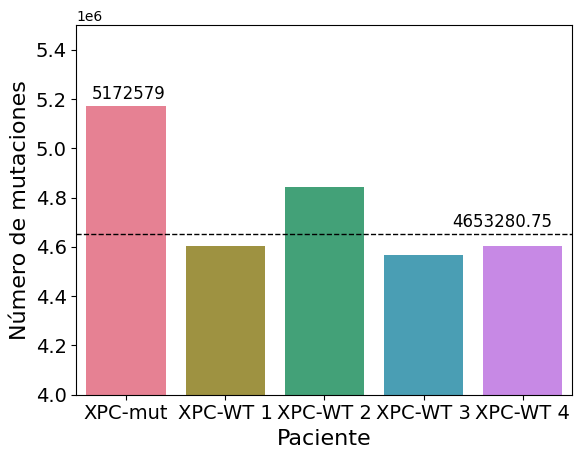

In [12]:
# Make a dataframe to represent data
df = {
    'Paciente': ['XPC-mut', 'XPC-WT 1', 'XPC-WT 2', 'XPC-WT 3', 'XPC-WT 4'],
    'Log Número de mutaciones': [mut_xpc, mut_pt1, mut_pt2, mut_pt3, mut_pt8]
}

df2 = pd.DataFrame(df)
ax2 = sns.barplot(x='Paciente', y='Log Número de mutaciones', hue = 'Paciente', data=df2, palette=sns.color_palette("husl", 5), legend=False)

# Set the scale for better visualization
ax2.set_ylim(4e6, 5.5e6)

# Set labels and title
ax2.set(xlabel='Paciente', ylabel='Número de mutaciones (log)')
ax2.set_xlabel('Paciente', fontsize=16)
ax2.set_ylabel('Número de mutaciones', fontsize=16)
# Set font size for ticks
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)  
plt.axhline(y=mean_value, color='black', linestyle='--', linewidth=1)
plt.text(4.3, 4.68e6 , mean_value, ha='right', fontsize=12, color='black')
plt.text(0.4, 5.2e6 , mut_xpc, ha='right', fontsize=12, color='black')

plt.savefig('/workspace/projects/sjd_melos/exports_images/germline_comparison.png', dpi=300, transparent=True, format='png', bbox_inches='tight')

# Show the plot
plt.show()